In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Modules


### Importing Important Modules

In [3]:
#importing all the required modules/library
import os
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### Data Preprocessing 


In [4]:
#setting encoder  
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

#pocessing data containing tumour
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/data_set/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

#processing data containing no tumour
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

#storing processed data for future use.
data = np.array(data)

result = np.array(result)
result = result.reshape(139,2)


### Data Splitting

In [5]:
#Splitting data and results(labels) for training and testing
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

### Creating Model Architecture

In [6]:
#creating a model with sequential architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
#print(model.summary())

### Training ( Fitting Model to Testing Data )

In [7]:
# Training / fitting model into testing data
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 6s 2s/step - loss: 32.4531 - val_loss: 65.6887
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 10.5379 - val_loss: 49.0650
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 7.4318 - val_loss: 17.5466
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 0.7183 - val_loss: 12.5183
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 2.7960 - val_loss: 5.0280
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 0.5329 - val_loss: 8.5368
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 0.4049 - val_loss: 14.8217
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.7177 - val_loss: 13.2689
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.4148 - val_loss: 8.1839
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.1827 - val_loss: 4.4495
Epoch 11/30
3/3 [========================

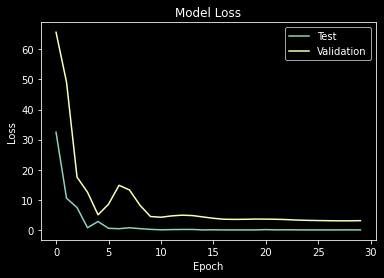

In [8]:
# visualizing losses of model wrt epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

### Saving Trained model

In [9]:
#Saving Trained model
tf.keras.models.save_model(model,'my_model.hdf5')

### Using Model for prediction / Inference 

In [10]:
#decoding output
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor
[[3.3981598e-19 1.0000000e+00]]


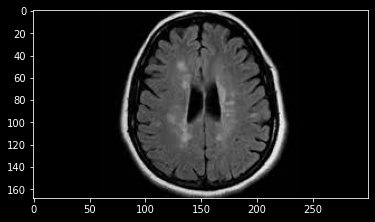

In [11]:
#using model for prediction
from matplotlib.pyplot import imshow
#img = Image.open(r"/content/bt2.jpg")
img = Image.open(r"/content/drive/MyDrive/data_set/brain_tumor_dataset/no/13 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))
print(res)

# For using model in an App

In [12]:
#decoding output
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its NOT a tumor'

100.0% Confident that Its a Tumor
[[1.000000e+00 1.701641e-08]]


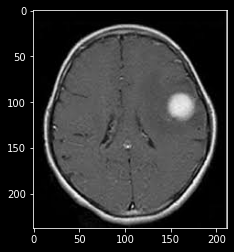

In [18]:
# loading Model
modelx=tf.keras.models.load_model('/content/my_model.hdf5') #passing model file

# taking image file and preprocessing
img = Image.open(r"/content/bt.jpg") #upload a testing img and give its path.
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)

#pridicting by passing img to model
res = modelx.predict_on_batch(x)

#showing pridiction as output
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confident that ' +names(classification))
print(res)

# A WebApp

In [19]:
%%writefile myapp.py
import streamlit as st
import tensorflow as tf
import numpy as np

# def
def show_uploaded_img(uploaded_file):
  img = Image.open(uploaded_file)
  st.subheader("Uploaded file")
  st.image(img)
  return img

def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its NOT a tumor'

def make_prediction(img):
  x = np.array(img.resize((128,128)))
  x = x.reshape(1,128,128,3)
  res = modelx.predict_on_batch(x)
  classification = np.where(res == np.amax(res))[1][0]
  st.subheader("Results")
  st.text(str(res[0][classification]*100) + '% Confident that ' +names(classification))
  #st.text(res) 

st.title("Brain Tumour Classifier")

st.header("Classifier X-RAY IMAGES")

st.subheader("Upload a file Brain scanned file")

uploaded_file = st.file_uploader("", type=['png','jpg','jpeg'])

modelx=tf.keras.models.load_model('/content/my_model3.hdf5') #getting pretrained model

if uploaded_file is not None:
  img = show_uploaded_img(uploaded_file)
  if st.button("Classify"):
    make_predicition(img)
  else:
    st.write("Some error occured while Classifying the image!!!")
else:
  st.write("No image uploaded!!!")
  st.write("Upload an image to identify tumor.")

Writing myapp.py
